In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('../data/raw/structure_projects.csv', sep=';')

In [5]:
df.head()

,Unnamed: 0,floor_name,version,project_code,floor_code,software,slab_type,depth,floor_number,total_height,...,cantilever_mean_dist,cantilever_max_dist,cantilever_min_dist,cantilever_area,span_dists,cantilever_dists,center_x,center_y,slab_total_area,ignored
0,0,NIVEL +3.5,spans,BOCB19002_C00_I00_H00_Q00_R00_V00_S00_O01,BOCB19002_C00_I00_H00_Q00_R00_V00_S00_O01_F0,CYPE,FOAM_WAFFLE,0.3,4,13.00,...,3.904998,32.810214,0.000020,1473.747210,"[[9.900126260505125, 9.900126260505125, 9.9001...","[[0.11202188255563243, 0.11204643310773815, 0....",116.622403,20.353500,3292.093703,NO
1,1,NIVEL +7,spans,BOCB19002_C00_I00_H00_Q00_R00_V00_S00_O01,BOCB19002_C00_I00_H00_Q00_R00_V00_S00_O01_F1,CYPE,FOAM_WAFFLE,0.3,4,13.00,...,1.727113,10.700214,0.000000,307.297292,"[[7.499999999883002, 7.499999999883002, 7.4999...","[[0.37525137149771126, 0.911099628468607, 0.61...",108.302400,20.353500,881.073190,NO
2,2,NIVEL +10,spans,BOCB19002_C00_I00_H00_Q00_R00_V00_S00_O01,BOCB19002_C00_I00_H00_Q00_R00_V00_S00_O01_F2,CYPE,FOAM_WAFFLE,0.3,4,13.00,...,0.691147,8.290196,0.058214,135.735964,"[[9.900126260505125, 9.900126260505125, 9.9001...","[[0.10001375377489564, 0.14508624932332606, 0....",11.353856,21.003500,215.658464,NO
3,3,NIVEL +13,spans,BOCB19002_C00_I00_H00_Q00_R00_V00_S00_O01,BOCB19002_C00_I00_H00_Q00_R00_V00_S00_O01_F3,CYPE,FOAM_WAFFLE,0.3,4,13.00,...,0.161825,0.315655,0.100014,115.681666,"[[9.60013020613433, 9.60013020613433, 8.900140...","[[0.11202188255563521, 0.10003625895267909, 0....",11.353856,21.003500,230.876940,NO
4,0,Sótano 1,spans,BOCB19004_C00_I00_H00_Q00_R00_V00_S00_O01,BOCB19004_C00_I00_H00_Q00_R00_V00_S00_O01_F0,CYPE,FOAM_WAFFLE,0.3,18,58.45,...,2.100032,6.436294,0.000032,134.408118,"[[23.843880609701003, 23.843880609701003, 9.87...","[[0.18106516001617137, 0.17977998363102696, 0....",25.619994,20.999437,803.681221,NO


In [21]:
num_total = len(df.groupby(by='project_code'))
num_ori = len(df[df['project_code'].str.contains('_C00_I00_H00_Q00_R00_V00_S00_O01')].groupby(by='project_code'))
num_ori_opt = len(df[df['project_code'].str.contains('_C00_I00_H00_Q00_R00_V00_S00_O02')].groupby(by='project_code'))
num_version = num_total - num_ori - num_ori_opt

print(f"Number of storeys: {len(df)}")
print(f"Number of projects: {num_total}")
print(f"\tOriginal: {num_ori}")
print(f"\tOriginal optimized: {num_ori_opt}")
print(f"\tVersioned: {num_version}")


Number of storeys: 22636
Number of projects: 1927
	Original: 250
	Original optimized: 37
	Versioned: 1640


In [9]:
df.info(150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22636 entries, 0 to 22635
Data columns (total 106 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    Unnamed: 0                         int64  
 1    floor_name                         object 
 2    version                            object 
 3    project_code                       object 
 4    floor_code                         object 
 5    software                           object 
 6    slab_type                          object 
 7    depth                              float64
 8    floor_number                       int64  
 9    total_height                       float64
 10   level                              float64
 11   height                             float64
 12   floor_max_height                   float64
 13   floor_min_height                   float64
 14   foundation_height                  float64
 15   max_height_all_floors              float64
 16   mi

<AxesSubplot: xlabel='reinf_steel_ratio', ylabel='Count'>

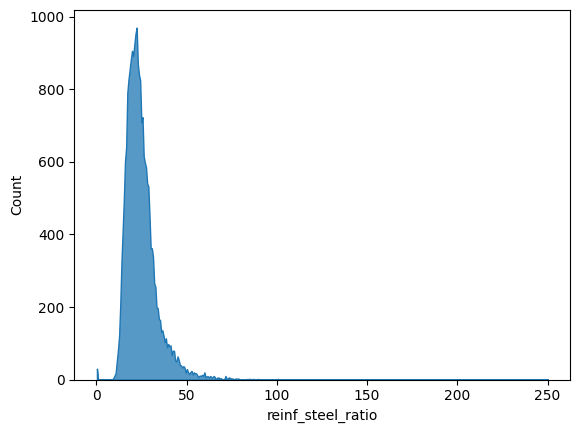

In [21]:
sns.histplot(df, x="reinf_steel_ratio", element="poly")

In [66]:
load_fields = ['LL', 'DL', 'LL_max', 'DL_max', 'wind_load_x', 'wind_load_y', 'seismic_acc']
areas = ['flat_slab_area', 'waffle_slab_area', 'total_area', ]
fields = ['project_code', 'reinf_steel_ratio', 'concrete_m3_ratio', 'slab_type', 'depth', 'floor_number', 'total_height', 
                                   'level', 'height', 'foundation_height', 'double_height']

In [67]:
df[df['project_code'] == 'BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01'][fields]

,project_code,reinf_steel_ratio,concrete_m3_ratio,slab_type,depth,floor_number,total_height,level,height,foundation_height,double_height
109,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,44.25,0.265244,FOAM_WAFFLE,0.3,19,26.04,-1.62,2.88,-4.5,0.000000
110,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,104.86,1.758484,FOAM_WAFFLE,0.3,19,26.04,0.00,1.62,-4.5,1131.000967
111,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,13.34,0.113670,FOAM_WAFFLE,0.3,19,26.04,1.44,1.44,-4.5,55.605263
112,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,52.55,0.225014,FOAM_WAFFLE,0.3,19,26.04,2.88,1.44,-4.5,547.885041
113,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,15.91,0.112793,FOAM_WAFFLE,0.3,19,26.04,4.32,1.44,-4.5,81.161777
114,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,45.70,0.222449,FOAM_WAFFLE,0.3,19,26.04,5.76,1.44,-4.5,549.114996
115,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,17.01,0.113099,FOAM_WAFFLE,0.3,19,26.04,7.20,1.44,-4.5,81.161326
116,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,43.26,0.221329,FOAM_WAFFLE,0.3,19,26.04,8.64,1.44,-4.5,536.572842
117,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,15.41,0.112307,FOAM_WAFFLE,0.3,19,26.04,10.08,1.44,-4.5,81.161326
118,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,42.14,0.221329,FOAM_WAFFLE,0.3,19,26.04,11.52,1.44,-4.5,549.111966


In [68]:
df[df['reinf_steel_ratio'] > 100][fields]

,project_code,reinf_steel_ratio,concrete_m3_ratio,slab_type,depth,floor_number,total_height,level,height,foundation_height,double_height
110,BOLP14017_C00_I00_H00_Q00_R00_V00_S00_O01,104.86,1.758484,FOAM_WAFFLE,0.30,19,26.04,0.00,1.62,-4.50,1131.000967
378,BOLP16027_C00_I00_H00_Q00_R00_V00_S00_O01,100.56,0.407667,FLAT_SLAB,0.20,28,76.53,76.53,1.44,-11.13,262.104526
538,BOLP17014M2_C02_I02_H12_Q01_R03_V07_S02_O01,106.50,0.290782,FOAM_WAFFLE,0.26,4,16.50,6.00,6.00,0.00,0.000000
8732,BOSC18012_C00_I00_H00_Q00_R00_V00_S00_O01,114.04,0.993859,FOAM_WAFFLE,0.30,14,35.50,0.00,2.45,-2.45,0.000000
15355,PYAS17020_C00_I00_H00_Q00_R00_V00_S00_O01,232.52,0.264480,FLAT_SLAB,0.20,18,54.65,5.76,2.96,-6.12,369.836419
17720,PYAS19031_C00_I00_H00_Q00_R00_V00_S00_O02,103.81,0.145283,FOAM_WAFFLE,0.25,13,38.77,32.96,1.44,-6.11,387.055657
20631,PYAS20205M1_C06_I01_H05_Q02_R03_V07_S00_O01,100.80,0.155889,FOAM_WAFFLE,0.30,17,53.30,7.80,3.50,-6.20,0.013483
20647,PYAS20205M1_C07_I02_H06_Q04_R08_V07_S00_O01,124.43,0.169511,FOAM_WAFFLE,0.31,17,57.55,5.05,3.75,-6.20,897.404176
20648,PYAS20205M1_C07_I02_H06_Q04_R08_V07_S00_O01,238.37,0.000000,FLAT_SLAB,0.20,17,57.55,8.80,3.75,-6.20,447.166555
20649,PYAS20205M1_C07_I02_H06_Q04_R08_V07_S00_O01,250.49,0.153137,FOAM_WAFFLE,0.31,17,57.55,12.55,3.75,-6.20,0.000000


In [27]:
df[['total_area', 'slab_total_area','stair_area', 'slope_area', 'flat_slab_area', 'waffle_slab_area']]

,total_area,slab_total_area,stair_area,slope_area,flat_slab_area,waffle_slab_area
0,3308.501367,3292.093703,10.991630,0.0,0.00000,3292.093703
1,897.301774,881.073190,10.991630,0.0,0.00000,881.073190
2,230.876940,215.658464,10.991630,0.0,0.00000,215.658464
3,230.876940,230.876940,0.000000,0.0,0.00000,230.876940
4,814.436669,803.681221,0.000000,0.0,0.00000,803.681221
...,...,...,...,...,...,...
22631,463.183169,447.884584,5.541459,0.0,0.00000,447.884584
22632,463.183169,446.968103,5.541459,0.0,0.00000,446.968103
22633,386.832387,370.617321,5.541459,0.0,0.00000,370.617321
22634,30.971660,30.971660,0.000000,0.0,30.97166,0.000000
